In [1]:
%matplotlib inline 

import simplike as sl

# download the data from HEPData or directly open python configs
USE_YAML_FILES = False

if USE_YAML_FILES:
  ## Load data from .yaml files
  from convert_yaml import *
  data   = yaml_table_to_pylist("HEPData-1535641814-v1-yaml/Table_1.yaml", 0)              # Table 1 contains data, signal
  signal = yaml_table_to_pylist("HEPData-1535641814-v1-yaml/Table_1.yaml", 1)
  background = yaml_table_to_pylist("HEPData-1535641814-v1-yaml/Table_2.yaml", 0)          # Table 2 contains the m_1 values
  covariance   = yaml_multi_table_to_pylist("HEPData-1535641814-v1-yaml/Table_3.yaml")     # Table 3 contains the m_2 matrix
  third_moment = yaml_table_to_pylist("HEPData-1535641814-v1-yaml/Table_4.yaml", 0)        # Table 4 contains the m_3 values

else:
  ## Alternatively, load data from a pre-prepared python module into the SL params objects
  exec(open("model-90_100000toys.py").read())

The inputs for the simplified likelihood $a_I$, $b_I$, $c_I$, and $\rho_{IJ}$, are calculated from the provided moments in the python model file $m_{1,I}$, $m_{2,IJ}$ and $m_{3,I}$, cf. eqs.(2.9)-(2.12) in the paper. 

The first step is to include `SLParams` class which computes these and higher-level statistics such as profile likelihoods, log likelihood-ratios, and related limit-setting measures computed using observed and expected signal yields. You can choose between the symmetric and asymmetric versions by including (or not) the third_moment data. In the example, we plot both. 

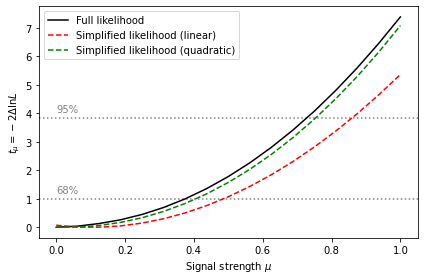

In [2]:
slp1 = sl.SLParams(background, covariance, obs=data, sig=signal)
slp2 = sl.SLParams(background, covariance, third_moment, obs=data, sig=signal)

## Convert to likelihood ratios etc. via profiling
import numpy as np
mus = np.linspace(0, 1, 16+1)
tmus1 = [slp1.tmu(mu) for mu in mus]
tmus2 = [slp2.tmu(mu) for mu in mus]
tmustrue = [0.0009691, 0.0411193, 0.1329959, 0.2649894, 0.4527930, 0.6973918, 0.9997511, 1.3608103,
            1.7814781, 2.2626238, 2.8050761, 3.4096148, 4.0769662, 4.8079994, 5.6025722, 6.4611683, 7.3840528]

## Make plot comparing linear, quadratic, and true likelihood ratios vs. signal strength
from matplotlib import pyplot as plt
plt.figure()
## CL threshold lines for 68% and 95%
plt.axhline(1.00, linestyle=":", color="gray")
plt.annotate("68%", xy=(0.0, 1+0.2), color="gray")
plt.axhline(3.84, linestyle=":", color="gray")
plt.annotate("95%", xy=(0.0, 3.84+0.2), color="gray")
## Likelihood lines
plt.plot(mus, tmustrue, "-", color="black", label="Full likelihood")
plt.plot(mus, tmus1, "--", color="red", label="Simplified likelihood (linear)")
plt.plot(mus, tmus2, "--", color="green", label="Simplified likelihood (quadratic)")
plt.legend(loc="best")
## Labels
plt.xlabel(r"Signal strength $\mu$")
plt.ylabel(r"$t_\mu = -2 \Delta \ln L$")
## Output
plt.tight_layout()
#plt.savefig("testtoy-tmuscan.pdf")
#plt.close()